전이학습
  - Fasion MNIST class 8
  - 샌들 셔츠를 제외한 모델생성 훈련
  - 샌들 셔츠만 구분하는 모델을 직접구현 VS 전이학습

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.fashion_mnist.load_data()
X = data[0][0]
y = data[0][1]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


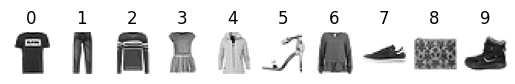

In [3]:
class_index = [np.where(y == i)[0][0] for i in range(10)]
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X[class_index[i]],cmap='gray_r')
  plt.title(y[class_index[i]])
  plt.axis('off')
plt.show()

In [4]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [18]:
# 클래스 2, 5번을 제외하고 8개로 학습모델
not_in_2_5_index = np.where((y != 2) & (y != 5))[0]
X_not_2_5 = X[not_in_2_5_index]
y_not_2_5 = y[not_in_2_5_index]
# 레이블 재 조정
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_not_2_5 = lb.fit_transform(y_not_2_5)

In [19]:
np.unique(y_not_2_5,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [45]:
# 모델구현
# hidden = 3
# batchnormal
model_A = tf.keras.models.Sequential()
model_A.add(tf.keras.layers.Input(shape=X_not_2_5.shape[1:]))
model_A.add(tf.keras.layers.Flatten())
model_A.add(tf.keras.layers.Normalization())


model_A.add(tf.keras.layers.Dense(50))
model_A.add(tf.keras.layers.BatchNormalization())
model_A.add(tf.keras.layers.Activation('relu'))
model_A.add(tf.keras.layers.Dense(8,activation='softmax'))

In [46]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model_A.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_not_2_5,y_not_2_5,test_size=0.2,random_state=42)

In [49]:
# 콜벡
check_point = tf.keras.callbacks.ModelCheckpoint('model_A.keras',save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
hist = model_A.fit(X_train,y_train,validation_split=0.2 ,epochs=3000,callbacks=[check_point,early_stop])


Epoch 1/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9095 - loss: 0.2393 - val_accuracy: 0.8408 - val_loss: 0.4367
Epoch 2/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9104 - loss: 0.2357 - val_accuracy: 0.8992 - val_loss: 0.2638
Epoch 3/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9192 - loss: 0.2171 - val_accuracy: 0.8888 - val_loss: 0.3033
Epoch 4/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9184 - loss: 0.2120 - val_accuracy: 0.9009 - val_loss: 0.2737
Epoch 5/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9209 - loss: 0.2075 - val_accuracy: 0.8987 - val_loss: 0.2886
Epoch 6/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9278 - loss: 0.1925 - val_accuracy: 0.8939 - val_loss: 0.2882
Epoch 7/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9294 - loss: 0.1858 - val_accuracy: 0.8901 - val_loss: 0.2929
Epoch 8/3000
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9313 - loss: 0.1842 - 

In [50]:
# 성능평가
model_A = tf.keras.models.load_model('model_A.keras')
model_A.evaluate(X_test,y_test)

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9007 - loss: 0.2723


[0.2642267346382141, 0.9027083516120911]

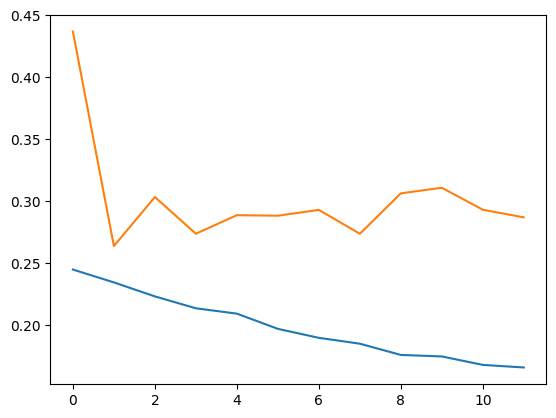

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [62]:
# 라벨 2와 5선택해서 모델을 구성하고 평가
index_2_5 = np.where((y == 2) | (y == 5))[0]
X_2_5 = X[index_2_5]
y_2_5 = y[index_2_5]
y_2_5 = lb.fit_transform(y_2_5)
np.unique(y_2_5,return_counts=True)


(array([0, 1]), array([6000, 6000]))

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X_2_5,y_2_5,test_size=0.2,random_state=42)

In [44]:
model_B = tf.keras.models.Sequential()
model_B.add(tf.keras.layers.Input(shape=x_train.shape[1:]))
model_B.add(tf.keras.layers.Flatten())
model_B.add(tf.keras.layers.Normalization())
model_B.add(tf.keras.layers.Dense(50))
model_B.add(tf.keras.layers.BatchNormalization())
model_B.add(tf.keras.layers.Activation('relu'))
model_B.add(tf.keras.layers.Dense(2,activation='softmax'))
# 모델 컴파일
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model_B.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜벡
check_point = tf.keras.callbacks.ModelCheckpoint('model_B.keras',save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
hist = model_B.fit(x_train,y_train,validation_split=0.2 ,epochs=3000,callbacks=[check_point,early_stop])
# 모델 로드
model_B = tf.keras.models.load_model('model_B.keras')
model_B.evaluate(x_test,y_test)

Epoch 1/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9615 - loss: 0.1039 - val_accuracy: 0.9990 - val_loss: 0.0073
Epoch 2/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0142 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 3/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9982 - loss: 0.0087 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 4/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.9990 - val_loss: 0.0058
Epoch 5/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9984 - val_loss: 0.0047
Epoch 6/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0053 - val_accuracy: 0.9974 - val_loss: 0.0099
Epoch 7/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9990 - val_loss: 0.0039
Epoch 8/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 0.0022 - 

[0.0067210993729531765, 0.9991666674613953]

In [66]:
# 전이학습 모델 불러오기
model_A = tf.keras.models.load_model("model_A.keras")
# 최종출력층을 제외한 나머지 레이어 가져와서 모델 구성하기
model_B_on_A =  tf.keras.Sequential( model_A.layers[:-1] )
model_B_on_A.add(tf.keras.layers.Dense(2,activation='softmax'))

In [67]:
y_train

array([0, 0, 1, ..., 1, 0, 1])

In [68]:
# 가중치 고정
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

# 모델 컴파일
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
# 콜벡
check_point = tf.keras.callbacks.ModelCheckpoint('model_B_on_A.keras',save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
model_B_on_A.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#  학습
hist = model_B_on_A.fit(x_train,y_train,validation_split=0.2 ,epochs=3000,callbacks=[check_point,early_stop])

Epoch 1/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6211 - loss: 1.0598 - val_accuracy: 0.9714 - val_loss: 0.1302
Epoch 2/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9821 - loss: 0.0981 - val_accuracy: 0.9854 - val_loss: 0.0629
Epoch 3/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9917 - loss: 0.0497 - val_accuracy: 0.9880 - val_loss: 0.0433
Epoch 4/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0351 - val_accuracy: 0.9901 - val_loss: 0.0337
Epoch 5/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0279 - val_accuracy: 0.9906 - val_loss: 0.0281
Epoch 6/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0225 - val_accuracy: 0.9917 - val_loss: 0.0242
Epoch 7/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0184 - val_accuracy: 0.9937 - val_loss: 0.0213
Epoch 8/3000
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9965 - loss: 0.0186 - 

In [69]:
#평가
model_B_on_A = tf.keras.models.load_model('model_B_on_A.keras')
model_B_on_A.evaluate(x_test,y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9992 - loss: 0.0026


[0.0028013959527015686, 0.9991666674613953]

In [70]:
# 사전훈련된 층 재사용  (가중치를 동결시키고 학습을 한 후에 다시 가중치를 풀고 다시 학습)

- 스케줄 : 옵티마이져에서 적용
  - 학습률을 에포크별로 학습을 할때 동적으로 조정하는 기법
  - 지수감쇠 : ExponentialDecay
    - 학습률을 지수적으로 감소
  - 구간별 감쇠 : PiecewiseConstanctDecay
    - 구간별로 학습률을 다르게 적용
    - 특정스텝에서 학습률을 크게 변경하고자 할때 유용
  - 다항 감쇠 : PolynormialDecay
  - 코사인 감쇠 : CosinDecay
  - 사용자 지정(커스텀) : 함수를 구현해서 적용